In [1]:
from sklearn.metrics import precision_recall_curve, average_precision_score, auc
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from tqdm.notebook import tqdm
import re

In [2]:
def get_pr_scores(results_file):
    
    results_df = pd.read_csv(results_file, header=None)
    y_pred = results_df[0].values
    y_true = results_df[1].values
    
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
    avg_score = average_precision_score(y_true, y_pred) 
    
    return avg_score, precision, recall, thresholds


def get_auprc(recall, precision):
    # x must be monotonically increasing or decreasing
    return auc(recall, precision)

In [3]:
# GLOBALS
PILOT=False
MODEL_NAME="hybrid"

if PILOT:
    suffix = "_pilot"
else:
    suffix = ""

TF="CEBPA"

In [4]:
src_file_hbd = f"../results/mm10/{TF}/hybrid_src.csv.gz"
src_file_grl = f"../results/mm10/{TF}/dann_src.csv.gz"
src_file_adda = f"../results/mm10/{TF}/adda_src.csv.gz"

In [5]:
tgt_file_hbd = f"../results/mm10/{TF}/hybrid_tgt.csv.gz"
tgt_file_grl = f"../results/mm10/{TF}/dann_tgt.csv.gz"
tgt_file_adda = f"../results/mm10/{TF}/adda_tgt.csv.gz"

In [15]:
df_src_hbd = pd.read_csv(src_file_hbd, header = None)

df_src_grl = pd.read_csv(src_file_grl, header = None)

df_src_adda = pd.read_csv(src_file_adda, header = None)

In [9]:
df_tgt_hbd = pd.read_csv(tgt_file_hbd, header = None)

df_tgt_grl = pd.read_csv(tgt_file_grl, header = None)

df_tgt_adda = pd.read_csv(tgt_file_adda, header = None)

In [6]:
mtes = get_pr_scores(tgt_file_hbd)

In [7]:
mtes[0]

0.16418005380113007

In [10]:
df_tgt_hbd

,0,1,2,3,4
0,0.034438,0,chr2,10000,10500
1,0.047866,0,chr2,10050,10550
2,0.045945,0,chr2,10100,10600
3,0.261537,0,chr2,10150,10650
4,0.157184,0,chr2,10200,10700
...,...,...,...,...,...
4339175,0.729706,0,chr2,242107000,242107500
4339176,0.852497,0,chr2,242107050,242107550
4339177,0.844844,0,chr2,242107100,242107600
4339178,0.945965,0,chr2,242107150,242107650


In [25]:
df_tgt_grl

,0,1,2,3,4
0,0.043936,0,chr2,10000,10500
1,0.047291,0,chr2,10050,10550
2,0.061037,0,chr2,10100,10600
3,0.374528,0,chr2,10150,10650
4,0.254948,0,chr2,10200,10700
...,...,...,...,...,...
4339175,0.764433,0,chr2,242107000,242107500
4339176,0.561003,0,chr2,242107050,242107550
4339177,0.848123,0,chr2,242107100,242107600
4339178,0.900139,0,chr2,242107150,242107650


In [26]:
df_tgt_adda

,0,1,2,3,4
0,0.065308,0,chr2,10000,10500
1,0.053488,0,chr2,10050,10550
2,0.074929,0,chr2,10100,10600
3,0.390768,0,chr2,10150,10650
4,0.164506,0,chr2,10200,10700
...,...,...,...,...,...
4339175,0.033275,0,chr2,242107000,242107500
4339176,0.037199,0,chr2,242107050,242107550
4339177,0.144475,0,chr2,242107100,242107600
4339178,0.571397,0,chr2,242107150,242107650


In [18]:
df_src_hbd

,0,1,2,3,4
0,0.011856,0,chr2,3050950,3051450
1,0.017189,0,chr2,3051000,3051500
2,0.017141,0,chr2,3051050,3051550
3,0.013075,0,chr2,3051100,3051600
4,0.015706,0,chr2,3051150,3051650
...,...,...,...,...,...
3164246,0.553431,0,chr2,182012150,182012650
3164247,0.471272,0,chr2,182012200,182012700
3164248,0.865704,0,chr2,182012250,182012750
3164249,0.888928,0,chr2,182012300,182012800


In [19]:
df_src_grl

,0,1,2,3,4
0,0.005289,0,chr2,3050950,3051450
1,0.006023,0,chr2,3051000,3051500
2,0.012222,0,chr2,3051050,3051550
3,0.029152,0,chr2,3051100,3051600
4,0.015991,0,chr2,3051150,3051650
...,...,...,...,...,...
3164246,0.361064,0,chr2,182012150,182012650
3164247,0.022857,0,chr2,182012200,182012700
3164248,0.019368,0,chr2,182012250,182012750
3164249,0.292576,0,chr2,182012300,182012800


In [20]:
df_src_adda

,0,1,2,3,4
0,0.011856,0,chr2,3050950,3051450
1,0.017189,0,chr2,3051000,3051500
2,0.017141,0,chr2,3051050,3051550
3,0.013075,0,chr2,3051100,3051600
4,0.015706,0,chr2,3051150,3051650
...,...,...,...,...,...
1353995,0.088723,0,chr2,78243350,78243850
1353996,0.007220,0,chr2,78243400,78243900
1353997,0.016033,0,chr2,78243450,78243950
1353998,0.103188,0,chr2,78243500,78244000


In [4]:
def get_auprc_multiprocess(i):
    source_file = f"../results/mm10_archive/{TF}/{MODEL_NAME}_src_epoch{i}.csv.gz"
    target_file = f"../results/mm10_archive/{TF}/{MODEL_NAME}_tgt_epoch{i}.csv.gz"
    
    source_metrics = get_pr_scores(source_file)
    target_metrics = get_pr_scores(target_file)
    
    src_auprc = get_auprc(source_metrics[2], source_metrics[1])
    tgt_auprc = get_auprc(target_metrics[2], target_metrics[1])
    
    return i,src_auprc,tgt_auprc  

In [5]:
# record the source and target metrics in a list
source_auprcs = []
target_auprcs = []

for i in tqdm(range(40)):
    source_file = f"../results/mm10_archive/{TF}/{MODEL_NAME}_src_epoch{i}.csv.gz"
    target_file = f"../results/mm10_archive/{TF}/{MODEL_NAME}_tgt_epoch{i}.csv.gz"
    
    source_metrics = get_pr_scores(source_file)
    target_metrics = get_pr_scores(target_file)
    src_auprc = get_auprc(source_metrics[2], source_metrics[1])
    tgt_auprc = get_auprc(target_metrics[2], target_metrics[1])
    
    source_auprcs.append(src_auprc)
    target_auprcs.append(tgt_auprc)

  0%|          | 0/40 [00:00<?, ?it/s]

In [6]:
string = "DEBUG:root:Epoch:6 Validation running loss:0.29982351765596155; Validation running APS:0.9383962788598027; Training domain accuracy:0.7881106242651386;"

def get_da(string):
    pattern = re.compile(".+Epoch:([\d]+).+domain accuracy:([\.\d]+);$")
    m = re.match(pattern, string)
    if m:
        epoch_num = m.group(1)
        da = m.group(2)
        return epoch_num, da
    return None

In [7]:
get_da(string)

('6', '0.7881106242651386')

In [8]:
logfile = "./archive/dann_debug.log"
da_list = []

with open(logfile, "r") as f:
    for lines in f:
        info = get_da(lines)
        if info:
            da_list.append(float(info[1]))


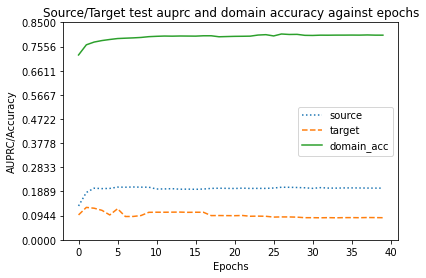

In [12]:
epochs = list(range(40))
plt.plot(epochs, source_auprcs, label="source", linestyle="dotted")
plt.plot(epochs, target_auprcs, label="target", linestyle="dashed")
plt.plot(epochs, da_list[:-1], label="domain_acc", linestyle="solid")
plt.yticks(np.linspace(0, 0.85, 10));
plt.legend();
plt.xlabel("Epochs")
plt.ylabel("AUPRC/Accuracy")
plt.title("Source/Target test auprc and domain accuracy against epochs");

In [14]:
target_auprcs[:15]

[0.09728540415837036,
 0.12668100668358906,
 0.12346289903505862,
 0.1151857951894343,
 0.09712216761888078,
 0.12141959347303018,
 0.09104108878916374,
 0.09125989181936087,
 0.09478825263600449,
 0.10740942901119656,
 0.10782073306400192,
 0.10774882300514169,
 0.10806868209878571,
 0.1083107080455265,
 0.107360277067474]